<a href="https://colab.research.google.com/github/Moe-phantom/leetcoding/blob/main/statistics_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Engineering Statitics Assignment SSCE2193**


# **Part A**
 Present *the* lightbulb production status from August to November 2025 in
numerical, tabular, and graphical formats. Describe your findings,
highlighting any notable results, patterns or trends. Ensure that all variables are
investigated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the data
# Adjust 'FutureGlow_Data.xlsx' to your actual filename
# sheet_name='Glowmaster R' targets the specific variant
# header=7 tells pandas the column names are on the 8th row (0-indexed)
df = pd.read_excel('/content/2_APPENDIX 1 BULB FUTUREGLOW 202520261 (2).xlsx', sheet_name='Glowmaster R', header=7)

# 2. Initial Data Inspection (Sanity Check)
# This removes empty columns often read by accident in formatted Excel sheets
df = df.dropna(how='all', axis=1)
df = df.dropna(how='all', axis=0)

# Check the first few rows to ensure headers are correct
print("--- Data Snapshot ---")
display(df.head())

# Check data types (Ensure measurements are floats, not strings)
print("\n--- Data Info ---")
df.info()

--- Data Snapshot ---


,Unnamed: 0,Luminous Flux,Color Temperature,Efficiency,Shift
0,1,35.4,13.2,1.2,Morning
1,2,27.1,12.1,0.8,Evening
2,3,25.2,17.1,1.7,Morning
3,4,31.5,15.0,1.5,Morning
4,5,20.8,15.5,1.2,Night



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         200 non-null    int64  
 1   Luminous Flux      200 non-null    float64
 2   Color Temperature  200 non-null    float64
 3   Efficiency         200 non-null    float64
 4   Shift              200 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [12]:
# 1. Overall Summary Statistics (Numerical Format)
# This gives count, mean, std dev, min, 25%, 50%, 75%, max
stats_summary = df[['Luminous Flux', 'Color Temperature', 'Efficiency']].describe()
print("--- Overall Production Statistics (Aug - Nov 2025) ---")
display(stats_summary)

# 2. Grouped Analysis by Shift (Tabular Format)
# This investigates if specific shifts (Morning vs. Night) produce lower quality
shift_analysis = df.groupby('Shift')[['Luminous Flux', 'Color Temperature', 'Efficiency']].agg(['mean', 'std', 'count'])
print("\n--- Production Quality by Shift ---")
display(shift_analysis)

--- Overall Production Statistics (Aug - Nov 2025) ---


,Luminous Flux,Color Temperature,Efficiency
count,200.000000,200.000000,200.000000
mean,24.841000,15.017500,1.281500
std,5.306279,2.099855,0.199012
min,12.100000,9.100000,0.600000
25%,20.575000,13.600000,1.200000
50%,25.300000,15.150000,1.300000
75%,28.900000,16.525000,1.400000
max,39.300000,20.100000,1.700000



--- Production Quality by Shift ---


Luminous Flux                 Color Temperature                  \
                 mean       std count              mean       std count   
Shift                                                                     
Evening     25.410448  5.109057    67         14.922388  2.187556    67   
Morning     24.138272  5.094030    81         15.271605  2.111826    81   
Night       25.201923  5.834263    52         14.744231  1.956028    52   

        Efficiency                  
              mean       std count  
Shift                               
Evening   1.283582  0.212914    67  
Morning   1.297531  0.203086    81  
Night     1.253846  0.173162    52

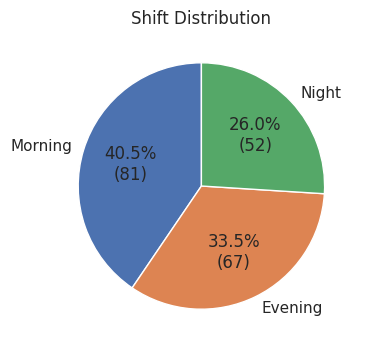

In [11]:

# 1. Calculate the counts dynamically
shift_counts = df['Shift'].value_counts()

# 2. Define a simple helper to show both % and Count
def show_values(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# 3. Plot the Basic Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(
    shift_counts,
    labels=shift_counts.index,
    autopct=lambda pct: show_values(pct, shift_counts),
    startangle=90
)

plt.title('Shift Distribution')
plt.show()

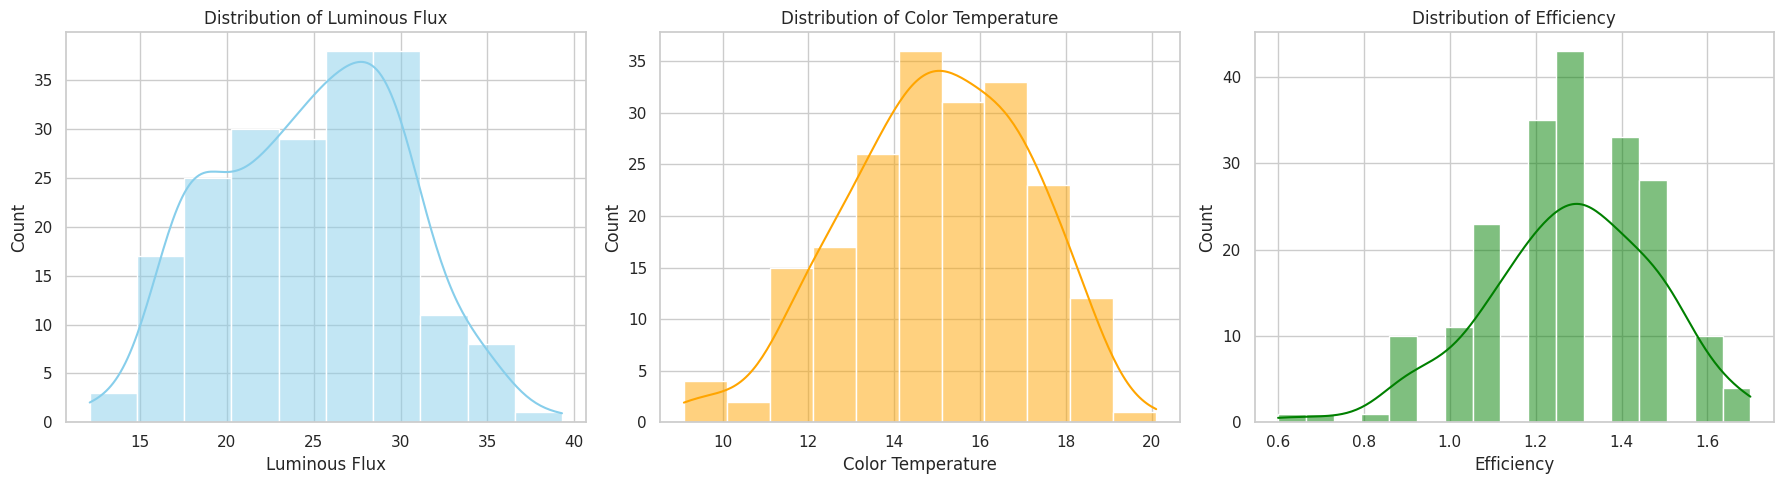

In [3]:
# Set visual style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Luminous Flux
sns.histplot(data=df, x='Luminous Flux', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Luminous Flux')

# Plot Color Temperature
sns.histplot(data=df, x='Color Temperature', kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Color Temperature')

# Plot Efficiency
sns.histplot(data=df, x='Efficiency', kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Efficiency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3727363073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shift', y='Luminous Flux', data=df, ax=axes[0], palette="Set2")
/tmp/ipython-input-3727363073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shift', y='Color Temperature', data=df, ax=axes[1], palette="Set2")
/tmp/ipython-input-3727363073.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shift', y='Efficiency', data=df, ax=axes[2], palette="Set2")


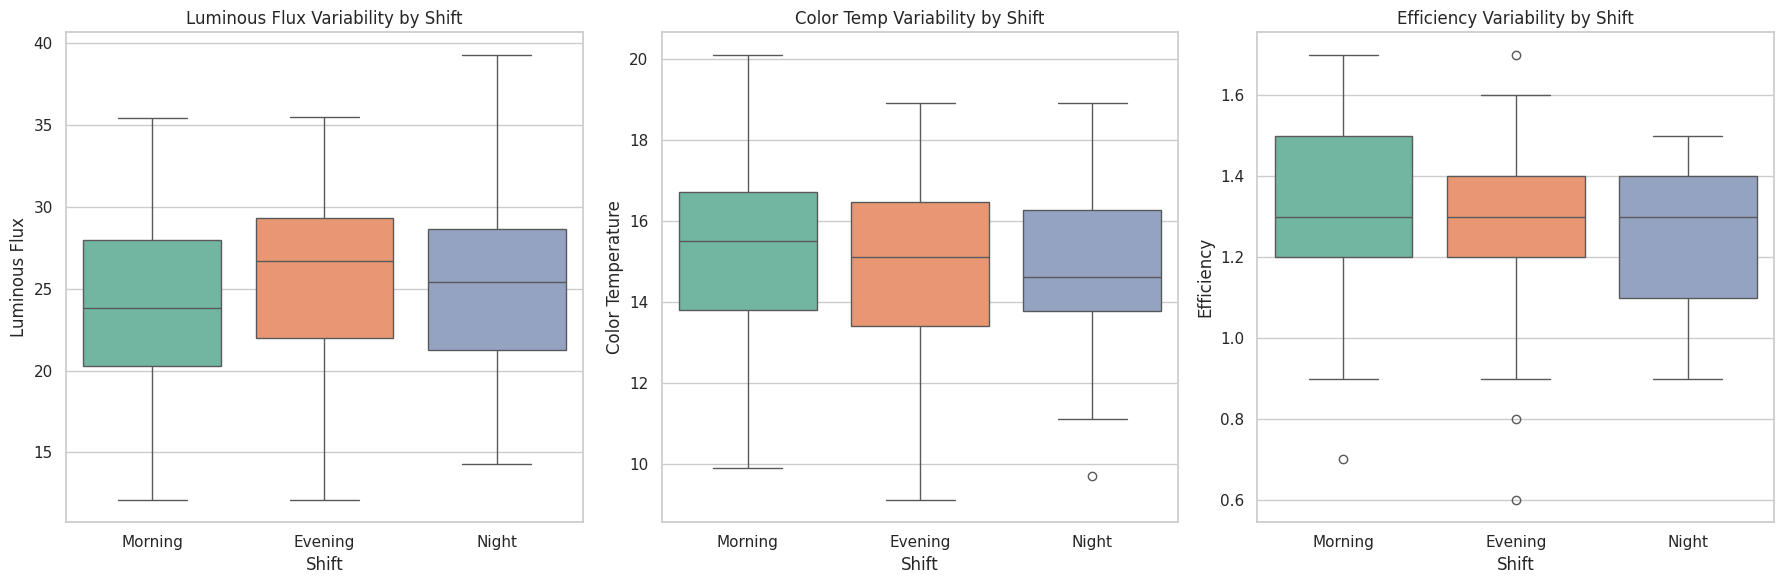

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Luminous Flux by Shift
sns.boxplot(x='Shift', y='Luminous Flux', data=df, ax=axes[0], palette="Set2")
axes[0].set_title('Luminous Flux Variability by Shift')

# Color Temp by Shift
sns.boxplot(x='Shift', y='Color Temperature', data=df, ax=axes[1], palette="Set2")
axes[1].set_title('Color Temp Variability by Shift')

# Efficiency by Shift
sns.boxplot(x='Shift', y='Efficiency', data=df, ax=axes[2], palette="Set2")
axes[2].set_title('Efficiency Variability by Shift')

plt.tight_layout()
plt.show()


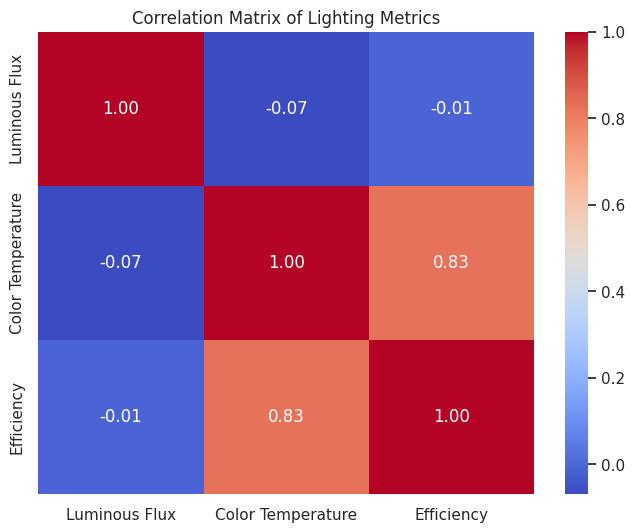

In [5]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Luminous Flux', 'Color Temperature', 'Efficiency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lighting Metrics')
plt.show()

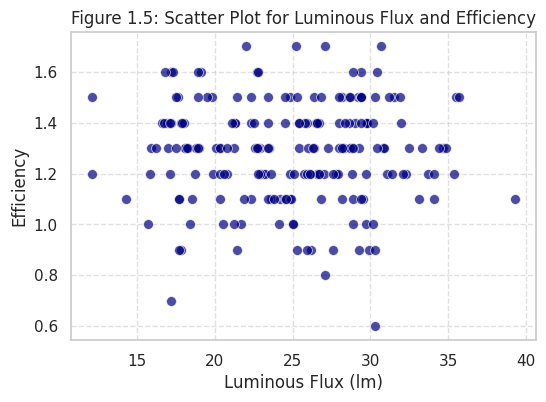

In [14]:
# Create the specific Scatter Plot for Luminous Flux vs Efficiency
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Luminous Flux', y='Efficiency', color='navy', s=50, alpha=0.7)

plt.title('Figure 1.5: Scatter Plot for Luminous Flux and Efficiency')
plt.xlabel('Luminous Flux (lm)')
plt.ylabel('Efficiency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

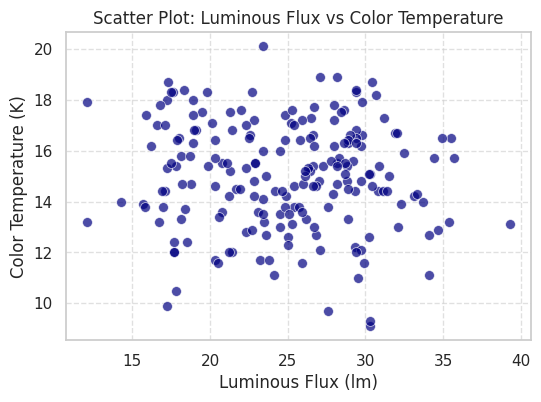

In [18]:

# Create the Scatter Plot for the final pair: Luminous Flux vs Color Temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Luminous Flux', y='Color Temperature', color='navy', s=50, alpha=0.7)

plt.title('Scatter Plot: Luminous Flux vs Color Temperature')
plt.xlabel('Luminous Flux (lm)')
plt.ylabel('Color Temperature (K)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# **Part B**
**One-Way ANOVA**

In [6]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Prepare the data
# We filter the dataframe to get just the Color Temp for each shift
morning = df[df['Shift'] == 'Morning']['Color Temperature']
evening = df[df['Shift'] == 'Evening']['Color Temperature']
night = df[df['Shift'] == 'Night']['Color Temperature']

# 2. Perform One-Way ANOVA
# Null Hypothesis (H0): All shift means are equal.
# Alt Hypothesis (H1): At least one shift mean is different.
f_stat, p_value = stats.f_oneway(morning, evening, night)

print(f"--- ANOVA Results for Color Temperature ---")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# 3. Interpretation Logic
alpha = 0.05
if p_value < alpha:
    print("\nResult: SIGNIFICANT difference found (Reject H0).")
    print("Recommendation: Run Tukey's HSD test to identify which specific shifts differ.")
else:
    print("\nResult: NO significant difference found (Fail to reject H0).")
    print("Conclusion: The variations in Color Temperature are likely due to random chance.")

--- ANOVA Results for Color Temperature ---
F-Statistic: 1.1033
P-Value: 0.3338

Result: NO significant difference found (Fail to reject H0).
Conclusion: The variations in Color Temperature are likely due to random chance.


# **Part C**
**Chi-Square Goodness-of-Fit Test**

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# 1. Define the Bins for the Frequency Table
# We use bins based on standard deviations (15, 20, 25, 30, 35) to cover the range
# Bins: <15, 15-20, 20-25, 25-30, 30-35, >35
bins = [-np.inf, 15, 20, 25, 30, 35, np.inf]
labels = ['< 15', '15 - 20', '20 - 25', '25 - 30', '30 - 35', '> 35']

# 2. Calculate Observed Frequencies (Actual Data)
observed_counts = pd.cut(df['Luminous Flux'], bins=bins, labels=labels).value_counts().sort_index()

# 3. Calculate Expected Frequencies (Theoretical Standard)
# Parameters given by Quality Control
mu_target = 25
sigma_target = 5
total_samples = len(df)

# Calculate probability for each bin using the CDF (Cumulative Density Function)
probs = []
for i in range(len(bins) - 1):
    lower = bins[i]
    upper = bins[i+1]
    # CDF gives probability up to a point. Prob between A and B is CDF(B) - CDF(A)
    p = stats.norm.cdf(upper, mu_target, sigma_target) - stats.norm.cdf(lower, mu_target, sigma_target)
    probs.append(p)

expected_counts = np.array(probs) * total_samples

# 4. Create the Frequency Table
freq_table = pd.DataFrame({
    'Range (lm)': labels,
    'Observed (O)': observed_counts.values,
    'Expected (E)': expected_counts.round(2)
})

# 5. Chi-Square Goodness-of-Fit Test
# We must ensure no expected count is 0. If expected < 5, usually we merge bins,
# but for this assignment, we will proceed (or you can note it in the report).
chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

print("--- Frequency Table ---")
display(freq_table)

print("\n--- Chi-Square Test Results ---")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nResult: Significant evidence of non-compliance (Reject H0).")
else:
    print("\nResult: Complies with standards (Fail to reject H0).")

--- Frequency Table ---


,Range (lm),Observed (O),Expected (E)
0,< 15,3,4.55
1,15 - 20,41,27.18
2,20 - 25,53,68.27
3,25 - 30,72,68.27
4,30 - 35,27,27.18
5,> 35,4,4.55



--- Chi-Square Test Results ---
Chi-Square Statistic: 11.2403
P-Value: 0.0468

Result: Significant evidence of non-compliance (Reject H0).


# **Part D**
liner regression

--- Correlation Strength ---
Pearson Correlation (r): 0.8268

--- Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:             Efficiency   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     427.7
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           2.33e-51
Time:                        03:24:43   Log-Likelihood:                 154.65
No. Observations:                 200   AIC:                            -305.3
Df Residuals:                     198   BIC:                            -298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

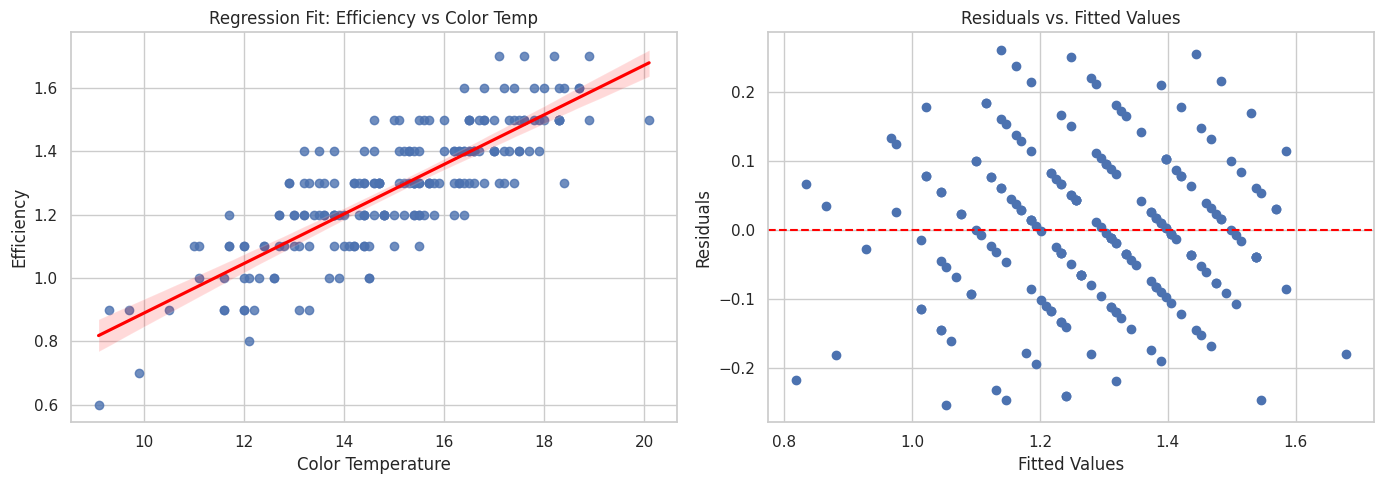

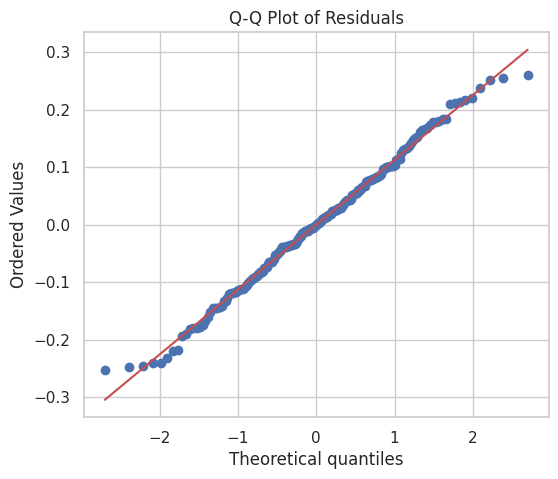

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# 1. Measure Strength (Correlation)
corr_coeff = df['Color Temperature'].corr(df['Efficiency'])
print(f"--- Correlation Strength ---")
print(f"Pearson Correlation (r): {corr_coeff:.4f}")

# 2. Fit the Linear Regression Model (OLS)
# X = Independent Variable (Color Temp), Y = Dependent Variable (Efficiency)
X = df['Color Temperature']
y = df['Efficiency']

# Add a constant (intercept) to the independent variable
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Print the full regression report
print("\n--- Regression Model Summary ---")
print(model.summary())

# 3. Predict for Specific Values (15, 20, 30)
new_temps = [15, 20, 30]
# We must add the constant column to the new data just like we did for training
X_new = sm.add_constant(new_temps)
predictions = model.predict(X_new)

print("\n--- Predictions ---")
for temp, pred in zip(new_temps, predictions):
    print(f"Color Temp: {temp}K -> Predicted Efficiency: {pred:.4f}")

# 4. Model Diagnostic Checks
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot A: Regression Fit
sns.regplot(x='Color Temperature', y='Efficiency', data=df, ax=axes[0], line_kws={'color':'red'})
axes[0].set_title('Regression Fit: Efficiency vs Color Temp')

# Plot B: Residuals vs Fitted (Check for Randomness)
residuals = model.resid
fitted_vals = model.fittedvalues
axes[1].scatter(fitted_vals, residuals)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs. Fitted Values')

plt.tight_layout()
plt.show()

# Plot C: QQ Plot (Check for Normality of Residuals)
plt.figure(figsize=(6, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()